## 3.2 Gradient Descent

Loss function $$J(w) = \frac{1}{n} \sum \limits_{i=1} ^{n} (y^{i}-\hat{y^{i}})^2 $$
where n is the number of samples, $y^{i}$ are the observed values, $\hat{y^{i}}$ are the predicted values

In [1]:
import pickle
import matplotlib.pylab as plt
import pandas as pd
import numpy as np

In [2]:
## load data
def load_data():
    df = pd.read_csv('normalized.txt', header=None)
    df.columns = ['area', 'bdrm', 'price']
    df ['intercept'] = 1.
    X = df[['intercept', 'area', 'bdrm']].values
    y = df['price'].values
    return X, y

In [3]:
def compute_error(pred, truth):
    # compute the mean squared error
    return np.mean(np.sum((pred-truth)**2, axis = 1))

In [4]:
def compute_grad(pred, truth, X):
    # compute the gradient
    return np.mean(np.sum((pred-truth), axis = 1, keepdims = True) * 2 * X, axis = 0, keepdims = True)

In [5]:
## training with gradient descent
def train(X, y, learning_rate, max_num_iter=1000):
    """
    write a function which apply Gradient descent to estimate parameter w
    Please also record the mean squared error in the iteration process and save it to error history
    """
    error_history = []
    J_matrix = []
    
    # initialize w
    num_dim = 3
    w = np.zeros((num_dim, 1), dtype = np.float32)#altered
    
    # ensure dimension is 2-dim
    y = y.reshape(y.shape[0], 1)
    
    
    num_iter = max_num_iter
    for steps in range(num_iter):
        # y = f(x1,x2) = w0+w1x1+w2x2
        # get predictions
        y_predict = X.dot(w)
        # compute MSE/J(w) and add it into error_history
        mse = compute_error(y_predict, y)
        error_history.append(mse)
        if steps in [10, 20, 30, 40, 50, 60, 70, 80]:
            J_value = compute_error(y_predict, y)
            J_matrix.append(J_value)
        # compute gradient descent over all training examples
        grad = compute_grad(y_predict, y, X)
        # perform gradient descent (vector update)
        w -= learning_rate * grad.T
    return w, error_history, J_matrix

At alpha = 0.01, w0 = [-8.7459824e-17], w1 = [0.8846979], w2 = [-0.05311083].
At alpha = 0.1, w0 = [-1.006301e-16], w1 = [0.8847658], w2 = [-0.05317871].
At alpha = 0.3, w0 = [-9.1769005e-17], w1 = [0.8847659], w2 = [-0.05317878].


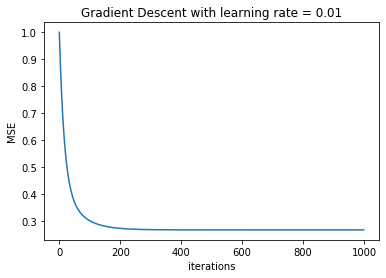

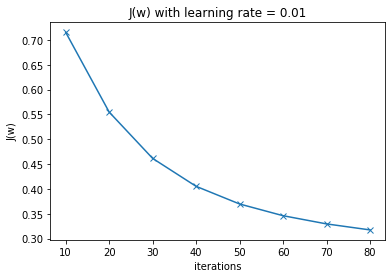

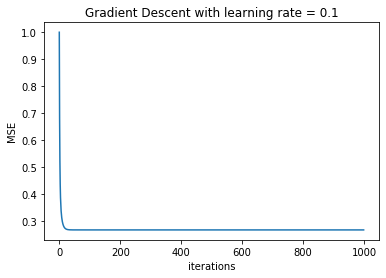

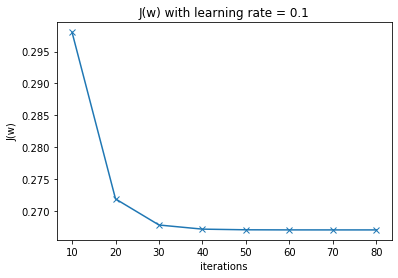

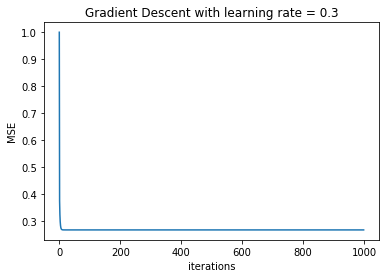

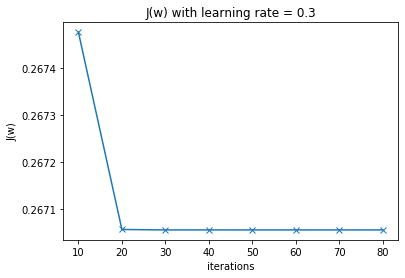

In [6]:
## fit regression model and plot the SSE vs. number of iterations
X, y = load_data()
x_value = [0,1,2,3,4,5,6,7]
label = ['10', '20', '30', '40', '50', '60', '70', '80']
for alpha in [0.01, 0.1, 0.3]:
    w, error_hist, J = train(X, y, alpha)
    #plot MSE vs num of iter 
    plt.figure()
    plt.plot(error_hist)
    plt.xlabel("iterations")
    plt.ylabel("MSE")
    plt.title("Gradient Descent with learning rate = %s"%alpha)
    #plot J vs selected iter
    plt.figure()
    plt.plot(J,"x-")
    plt.xlabel("iterations")
    plt.ylabel("J(w)")
    plt.xticks(x_value,label)
    plt.title("J(w) with learning rate = %s"%alpha)
    print("At alpha = %s, w0 = %s, w1 = %s, w2 = %s."%(alpha,w[0],w[1],w[2]))
    

## 3.3 Make prediction based on the linear regression model you get

In [7]:
# get the values used for normalization
f = open('mean_std.pk', 'rb')
norm_params = pickle.load(f)
l, b, p = norm_params['area'], norm_params['n_bedroom'], norm_params['price']
f.close()

In [8]:
# first normalize the features and then make predictions
new_house = {'area': 3150, 'bdrm': 4}
norm_new_area = (new_house['area'] - l['mean']) / l['std']
norm_new_bdrm = (new_house['bdrm'] - b['mean']) / b['std']
# y = f(x1,x2) = w0+w1x1+w2x2
norm_new_price = w[0] + w[1] * norm_new_area + w[2] * norm_new_bdrm
# denormalize the price
pred_price = norm_new_price * p['std'] + p['mean']
# print out the predicted value
# print("The w is {}, and pred_price is {}\n".format(w, pred_price))
print("The w is w0 = {}, w1 = {}, w2 = {}, and pred_price is {}\n".format(w[0], w[1], w[2], pred_price))

The w is w0 = [-9.1769005e-17], w1 = [0.8847659], w2 = [-0.05317878], and pred_price is [493159.44]

